# Goal & setup
**Goal:** Load data, check quality, inspect distributions/outliers, and persist clean artifacts (interim data + plots).

# 0. Kernel & imports

In [26]:
%matplotlib inline
from pathlib import Path

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler


# project helpers
from config import RAW_DATA_DIR, INTERIM_DATA_DIR  # keep your current layout
from dataset import (
    load_competition_raw,
    load_original_raw,
    build_competition_tables,
    build_original_table
)

# style / display
sns.set(style="whitegrid")
pd.set_option("display.max_columns", 120)

# Define figure output directory (relative to project root)
FIG_DIR = Path("../reports/figures")
FIG_DIR.mkdir(parents=True, exist_ok=True)


# 1. Load datasets

In [5]:
# Competition (train/test/labels)
df_comp_train, df_comp_labels, df_comp_test = load_competition_raw(RAW_DATA_DIR)

# Original auxiliary tables (optional for cross-checking or enrichment)
df_og_damage, df_og_struct, df_og_owner = load_original_raw(RAW_DATA_DIR)

# Merge train + labels to one analysis table. Keep test set as it is.
df_comp, df_comp_test = build_competition_tables(df_comp_train, df_comp_labels, df_comp_test)

# Build merged original dataset
df_og = build_original_table(df_og_struct, df_og_owner)

df_comp.head()

/Users/joscha/PythonProjects/earthquake-damage-ml/src/dataset.py:56: DtypeWarning: Columns (5,17,29,34,35,36,37,38,39,40,41,42,43,47,50) have mixed types. Specify dtype option on import or set low_memory=False.
  damage = pd.read_csv(og / "csv_building_damage_assessment.csv")


,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,legal_ownership_status,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
0,802906,6,487,12198,2,30,6,5,t,r,n,f,q,t,d,1,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,3
1,28830,8,900,2812,2,10,8,7,o,r,n,x,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,2
2,94947,21,363,8973,2,10,5,5,t,r,n,f,x,t,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,3
3,590882,22,418,10694,2,10,6,5,t,r,n,f,x,s,d,0,1,0,0,0,0,1,1,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,2
4,201944,11,131,1488,3,30,8,9,t,r,n,f,x,s,d,1,0,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,3


# 3. Compare columns of original and competition datasets

### 3.1 Column overview

In [6]:
print("Original dataset – columns:")
print(df_og.columns.tolist())
print("\nCompetition dataset – columns:")
print(df_comp_train.columns.tolist())

Original dataset – columns:
['building_id', 'district_id_x', 'vdcmun_id_x', 'ward_id_x', 'count_floors_pre_eq', 'count_floors_post_eq', 'age_building', 'plinth_area_sq_ft', 'height_ft_pre_eq', 'height_ft_post_eq', 'land_surface_condition', 'foundation_type', 'roof_type', 'ground_floor_type', 'other_floor_type', 'position', 'plan_configuration', 'has_superstructure_adobe_mud', 'has_superstructure_mud_mortar_stone', 'has_superstructure_stone_flag', 'has_superstructure_cement_mortar_stone', 'has_superstructure_mud_mortar_brick', 'has_superstructure_cement_mortar_brick', 'has_superstructure_timber', 'has_superstructure_bamboo', 'has_superstructure_rc_non_engineered', 'has_superstructure_rc_engineered', 'has_superstructure_other', 'condition_post_eq', 'damage_grade', 'technical_solution_proposed', 'district_id_y', 'vdcmun_id_y', 'ward_id_y', 'legal_ownership_status', 'count_families', 'has_secondary_use', 'has_secondary_use_agriculture', 'has_secondary_use_hotel', 'has_secondary_use_rental'

### 3.2 Preview of the first rows


In [7]:
print("\nPreview of original data:")
display(df_og.head())

print("\nPreview of competition data (train):")
display(df_comp_train.head())


Preview of original data:


,building_id,district_id_x,vdcmun_id_x,ward_id_x,count_floors_pre_eq,count_floors_post_eq,age_building,plinth_area_sq_ft,height_ft_pre_eq,height_ft_post_eq,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,condition_post_eq,damage_grade,technical_solution_proposed,district_id_y,vdcmun_id_y,ward_id_y,legal_ownership_status,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
0,120101000011,12,1207,120703,1,1,9,288,9,9,Flat,Other,Bamboo/Timber-Light roof,Mud,Not applicable,Not attached,Rectangular,0,1,0,0,0,0,0,1,0,0,0,Damaged-Used in risk,Grade 3,Major repair,12,1207,120703,Private,1.0,0.0,0,0,0,0,0,0,0,0,0,0
1,120101000021,12,1207,120703,1,1,15,364,9,9,Flat,Other,Bamboo/Timber-Light roof,Mud,Not applicable,Not attached,Rectangular,0,1,0,0,0,0,0,1,0,0,0,Damaged-Repaired and used,Grade 5,Reconstruction,12,1207,120703,Private,1.0,0.0,0,0,0,0,0,0,0,0,0,0
2,120101000031,12,1207,120703,1,1,20,384,9,9,Flat,Other,Bamboo/Timber-Light roof,Mud,Not applicable,Not attached,Rectangular,0,1,0,0,0,0,0,0,0,0,0,Damaged-Repaired and used,Grade 2,Minor repair,12,1207,120703,Private,1.0,0.0,0,0,0,0,0,0,0,0,0,0
3,120101000041,12,1207,120703,1,1,20,312,9,9,Flat,Other,Bamboo/Timber-Light roof,Mud,Not applicable,Not attached,Rectangular,0,1,0,0,0,0,0,0,0,0,0,Damaged-Repaired and used,Grade 2,Minor repair,12,1207,120703,Private,1.0,0.0,0,0,0,0,0,0,0,0,0,0
4,120101000051,12,1207,120703,1,1,30,308,9,9,Flat,Other,Bamboo/Timber-Light roof,Mud,Not applicable,Not attached,Rectangular,0,1,0,0,0,0,0,0,0,0,0,Damaged-Repaired and used,Grade 1,Minor repair,12,1207,120703,Private,1.0,0.0,0,0,0,0,0,0,0,0,0,0



Preview of competition data (train):


,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,legal_ownership_status,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
0,802906,6,487,12198,2,30,6,5,t,r,n,f,q,t,d,1,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
1,28830,8,900,2812,2,10,8,7,o,r,n,x,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
2,94947,21,363,8973,2,10,5,5,t,r,n,f,x,t,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
3,590882,22,418,10694,2,10,6,5,t,r,n,f,x,s,d,0,1,0,0,0,0,1,1,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
4,201944,11,131,1488,3,30,8,9,t,r,n,f,x,s,d,1,0,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0


### 3.3 Column comparison


In [8]:
original_columns = set(df_og.columns)
competition_columns = set(df_comp_train.columns)

missing_in_competition = original_columns - competition_columns
missing_in_original = competition_columns - original_columns

print("\nColumns only in the original dataset:")
print(sorted(missing_in_competition) if missing_in_competition else "None")

print("\nColumns only in the competition dataset:")
print(sorted(missing_in_original) if missing_in_original else "None")


Columns only in the original dataset:
['age_building', 'condition_post_eq', 'count_floors_post_eq', 'damage_grade', 'district_id_x', 'district_id_y', 'height_ft_post_eq', 'height_ft_pre_eq', 'plinth_area_sq_ft', 'technical_solution_proposed', 'vdcmun_id_x', 'vdcmun_id_y', 'ward_id_x', 'ward_id_y']

Columns only in the competition dataset:
['age', 'area_percentage', 'geo_level_1_id', 'geo_level_2_id', 'geo_level_3_id', 'height_percentage']


### 3.4 Dataset shape comparison

In [9]:

print("\nDataset shapes:")
print(f"Original: {df_og.shape[0]} rows, {df_og.shape[1]} columns")
print(f"Competition (train): {df_comp_train.shape[0]} rows, {df_comp_train.shape[1]} columns")
print(f"Competition (test): {df_comp_test.shape[0]} rows, {df_comp_test.shape[1]} columns")


Dataset shapes:
Original: 762106 rows, 47 columns
Competition (train): 260601 rows, 39 columns
Competition (test): 86868 rows, 39 columns


# 4. Check for Missing Values


In [10]:
def check_missing_values(df: pd.DataFrame, name: str) -> pd.Series:
    """
    Display the number of missing values per column for a given DataFrame.
    
    Args:
        df (pd.DataFrame): Dataset to check.
        name (str): Name of the dataset (for labeling).
    """
    missing = df.isnull().sum()
    missing = missing[missing > 0].sort_values(ascending=False)
    
    if missing.empty:
        print(f"No missing values found in {name}.")
    else:
        print(f"Missing values in {name}:")
        display(missing)


In [11]:
# Check both datasets
check_missing_values(df_og, "Original dataset")
check_missing_values(df_comp_train, "Competition train dataset")

Missing values in Original dataset:


damage_grade                   12
technical_solution_proposed    12
has_secondary_use              10
count_families                  2
position                        1
plan_configuration              1
dtype: int64

No missing values found in Competition train dataset.


# 5. Check for Duplicates

### 5.1 Competition dataset

In [12]:
# Check for duplicates
print("Before:", df_comp_train.shape)
print("Number of duplicates:", df_comp_train.duplicated().sum())

# Remove duplicates
df_comp_train = df_comp_train.drop_duplicates()

print("After:", df_comp_train.shape)

Before: (260601, 39)
Number of duplicates: 0
After: (260601, 39)


### 5.2 Original Dataset

In [13]:
# Check for duplicates
print("Before:", df_og.shape)
print("Number of duplicates:", df_og.duplicated().sum())

# Remove duplicates
df_og = df_og.drop_duplicates()

print("After:", df_og.shape)

Before: (762106, 47)
Number of duplicates: 0
After: (762106, 47)


# 6. Outlier Check

### 6.1 Check outliers in numeric features

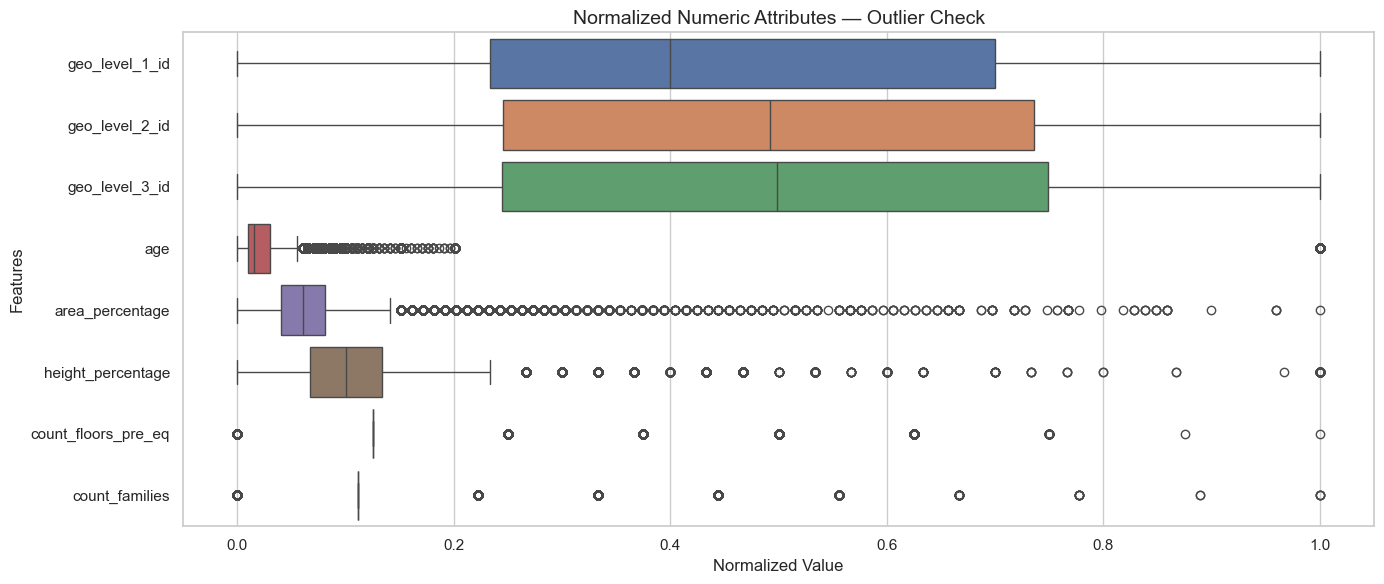

In [27]:
# Select numeric columns
numeric_columns = [
    "geo_level_1_id",
    "geo_level_2_id",
    "geo_level_3_id",
    "age",
    "area_percentage",
    "height_percentage",
    "count_floors_pre_eq",
    "count_families",
]

# Normalize numeric data
scaler = MinMaxScaler()
df_normalized = pd.DataFrame(
    scaler.fit_transform(df_comp_train[numeric_columns]),
    columns=numeric_columns
)

# Plot boxplot
sns.set(style="whitegrid")
plt.figure(figsize=(14, 6))
sns.boxplot(data=df_normalized, orient="h")
plt.title("Normalized Numeric Attributes — Outlier Check", fontsize=14)
plt.xlabel("Normalized Value")
plt.ylabel("Features")
plt.tight_layout()

# Save figure
fig_path = FIG_DIR / "boxplot_numeric_features.png"
plt.savefig(fig_path, dpi=300)
plt.show()


### 6.2 Check outliers in specific columns

<function matplotlib.pyplot.show(close=None, block=None)>

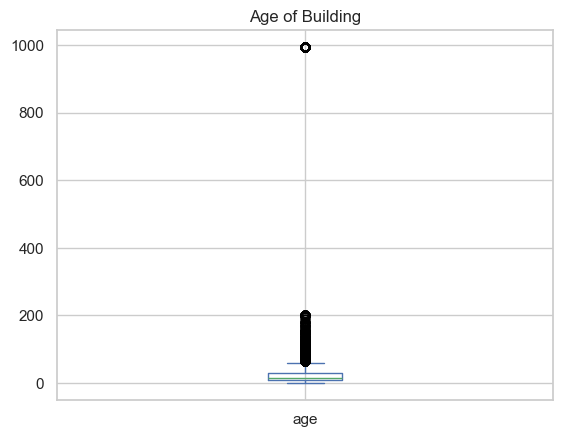

In [30]:
df_comp_train["age"].plot(kind = "box", title = "Age of Building")
# Save figure
fig_path = FIG_DIR / "boxplot_age.png"
plt.savefig(fig_path, dpi=300)
plt.show
# df_comp_train["geo_level_1_id"].plot(kind = "box", title = "geo_level_1_id")
# plt.show
# df_comp_train["geo_level_2_id"].plot(kind = "box", title = "geo_level_2_id")
# plt.show
# df_comp_train["geo_level_3_id"].plot(kind = "box", title = "geo_level_3_id")
# plt.show
# df_comp_train["count_floors_pre_eq"].plot(kind = "box", title = "Etagenanzahl")
# plt.show
# df_comp_train["area_percentage"].plot(kind = "box", title = "Grundfläche")
# plt.show
# df_comp_train["height_percentage"].plot(kind = "box", title = "Höhe")
# plt.show

### 6.3 Check outliers in age column

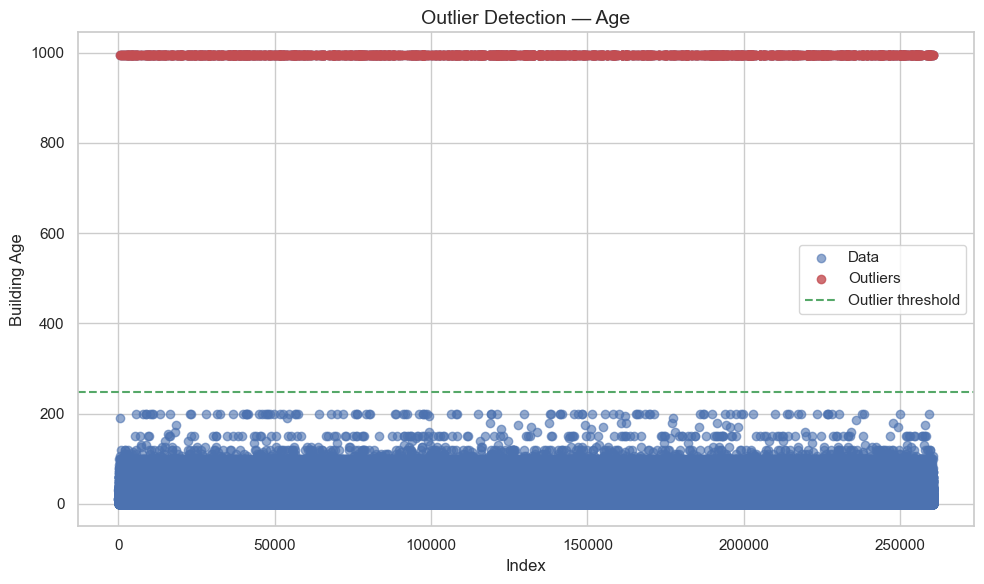

In [35]:
# Calculate mean and standard deviation
mean_age = df_comp_train["age"].mean()
std_age = df_comp_train["age"].std()

# Define outlier threshold (e.g., mean + 3*std)
outlier_threshold = mean_age + 3 * std_age

# Identify outliers
outliers = df_comp_train[df_comp_train["age"] > outlier_threshold]

# Plot the data with outliers highlighted
plt.figure(figsize=(10, 6))
plt.scatter(df_comp_train.index, df_comp_train["age"], label="Data", alpha=0.6)
plt.scatter(outliers.index, outliers["age"], color="r", label="Outliers", alpha=0.8)
plt.axhline(y=outlier_threshold, color="g", linestyle="--", label="Outlier threshold")
plt.title("Outlier Detection — Age", fontsize=14)
plt.xlabel("Index")
plt.ylabel("Building Age")
plt.legend()
plt.tight_layout()

# Save figure
fig_path = FIG_DIR / "outlier_age.png"
plt.savefig(fig_path, dpi=300)
plt.show()

In [36]:
# Check for extreme values (e.g., 995 years)
extreme_value = 995
extreme_cases = df_comp_train[df_comp_train["age"] >= extreme_value]

# Print results
print(f"Number of outliers above {outlier_threshold:.2f}: {len(outliers)}")
print(f"Number of extreme values (>= {extreme_value}): {len(extreme_cases)}")
extreme_cases.head()

Number of outliers above 247.23: 1390
Number of extreme values (>= 995): 1390


,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,legal_ownership_status,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
386,435557,14,1120,3789,3,995,12,5,t,r,n,f,q,s,d,0,1,0,0,0,0,1,0,0,0,0,v,1,1,1,0,0,0,0,0,0,0,0,0
716,597626,26,39,1851,2,995,27,6,t,i,x,v,s,j,d,0,0,0,0,0,1,0,0,0,1,0,v,3,0,0,0,0,0,0,0,0,0,0,0
1235,7560,26,1132,9472,2,995,8,5,t,r,q,f,x,s,d,0,1,0,0,0,0,1,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
1398,797271,26,39,1851,2,995,14,6,t,u,n,v,s,t,d,0,0,0,0,0,1,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
1635,857371,24,628,10750,2,995,10,5,t,r,n,f,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0


# 7. Descriptive Statistics

In [37]:
df_comp_train.describe()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
count,2.606010e+05,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000
mean,5.256755e+05,13.900353,701.074685,6257.876148,2.129723,26.535029,8.018051,5.434365,0.088645,0.761935,0.034332,0.018235,0.068154,0.075268,0.254988,0.085011,0.042590,0.015859,0.014985,0.983949,0.111880,0.064378,0.033626,0.008101,0.000940,0.000361,0.001071,0.000188,0.000146,0.000088,0.005119
std,3.045450e+05,8.033617,412.710734,3646.369645,0.727665,73.565937,4.392231,1.918418,0.284231,0.425900,0.182081,0.133800,0.252010,0.263824,0.435855,0.278899,0.201931,0.124932,0.121491,0.418389,0.315219,0.245426,0.180265,0.089638,0.030647,0.018989,0.032703,0.013711,0.012075,0.009394,0.071364
min,4.000000e+00,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.611900e+05,7.000000,350.000000,3073.000000,2.000000,10.000000,5.000000,4.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5.257570e+05,12.000000,702.000000,6270.000000,2.000000,15.000000,7.000000,5.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,7.897620e+05,21.000000,1050.000000,9412.000000,2.000000,30.000000,9.000000,6.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.052934e+06,30.000000,1427.000000,12567.000000,9.000000,995.000000,100.000000,32.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,9.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# 8. Histogram of features

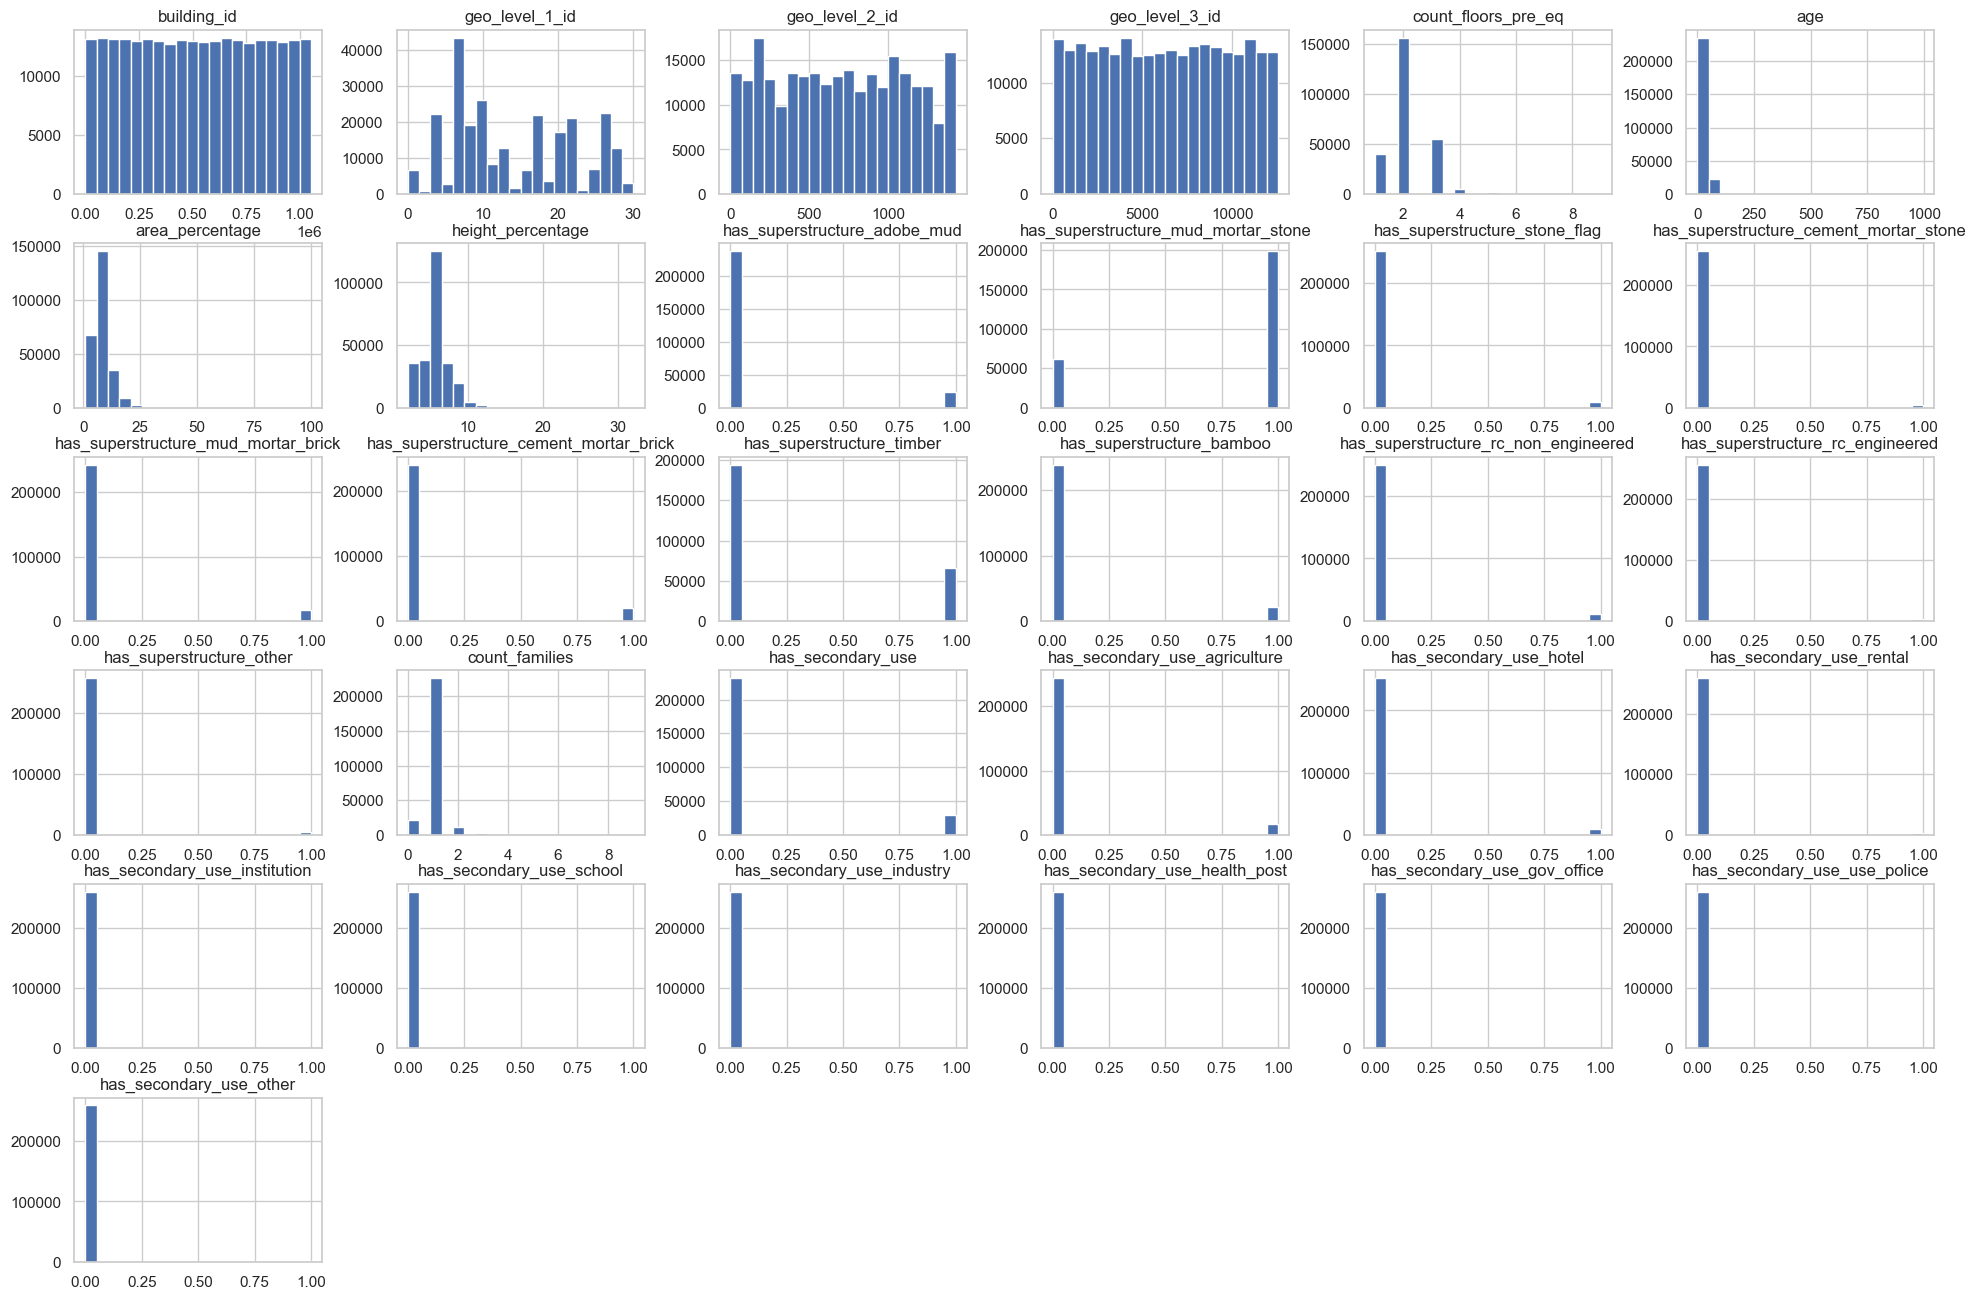

In [38]:
df_comp_train.hist(figsize=(24, 16), bins=20)

# Save figure
fig_path = FIG_DIR / "histogram_features.png"
plt.savefig(fig_path, dpi=300)
plt.show()


# 9. Correlation matrix of numeric features

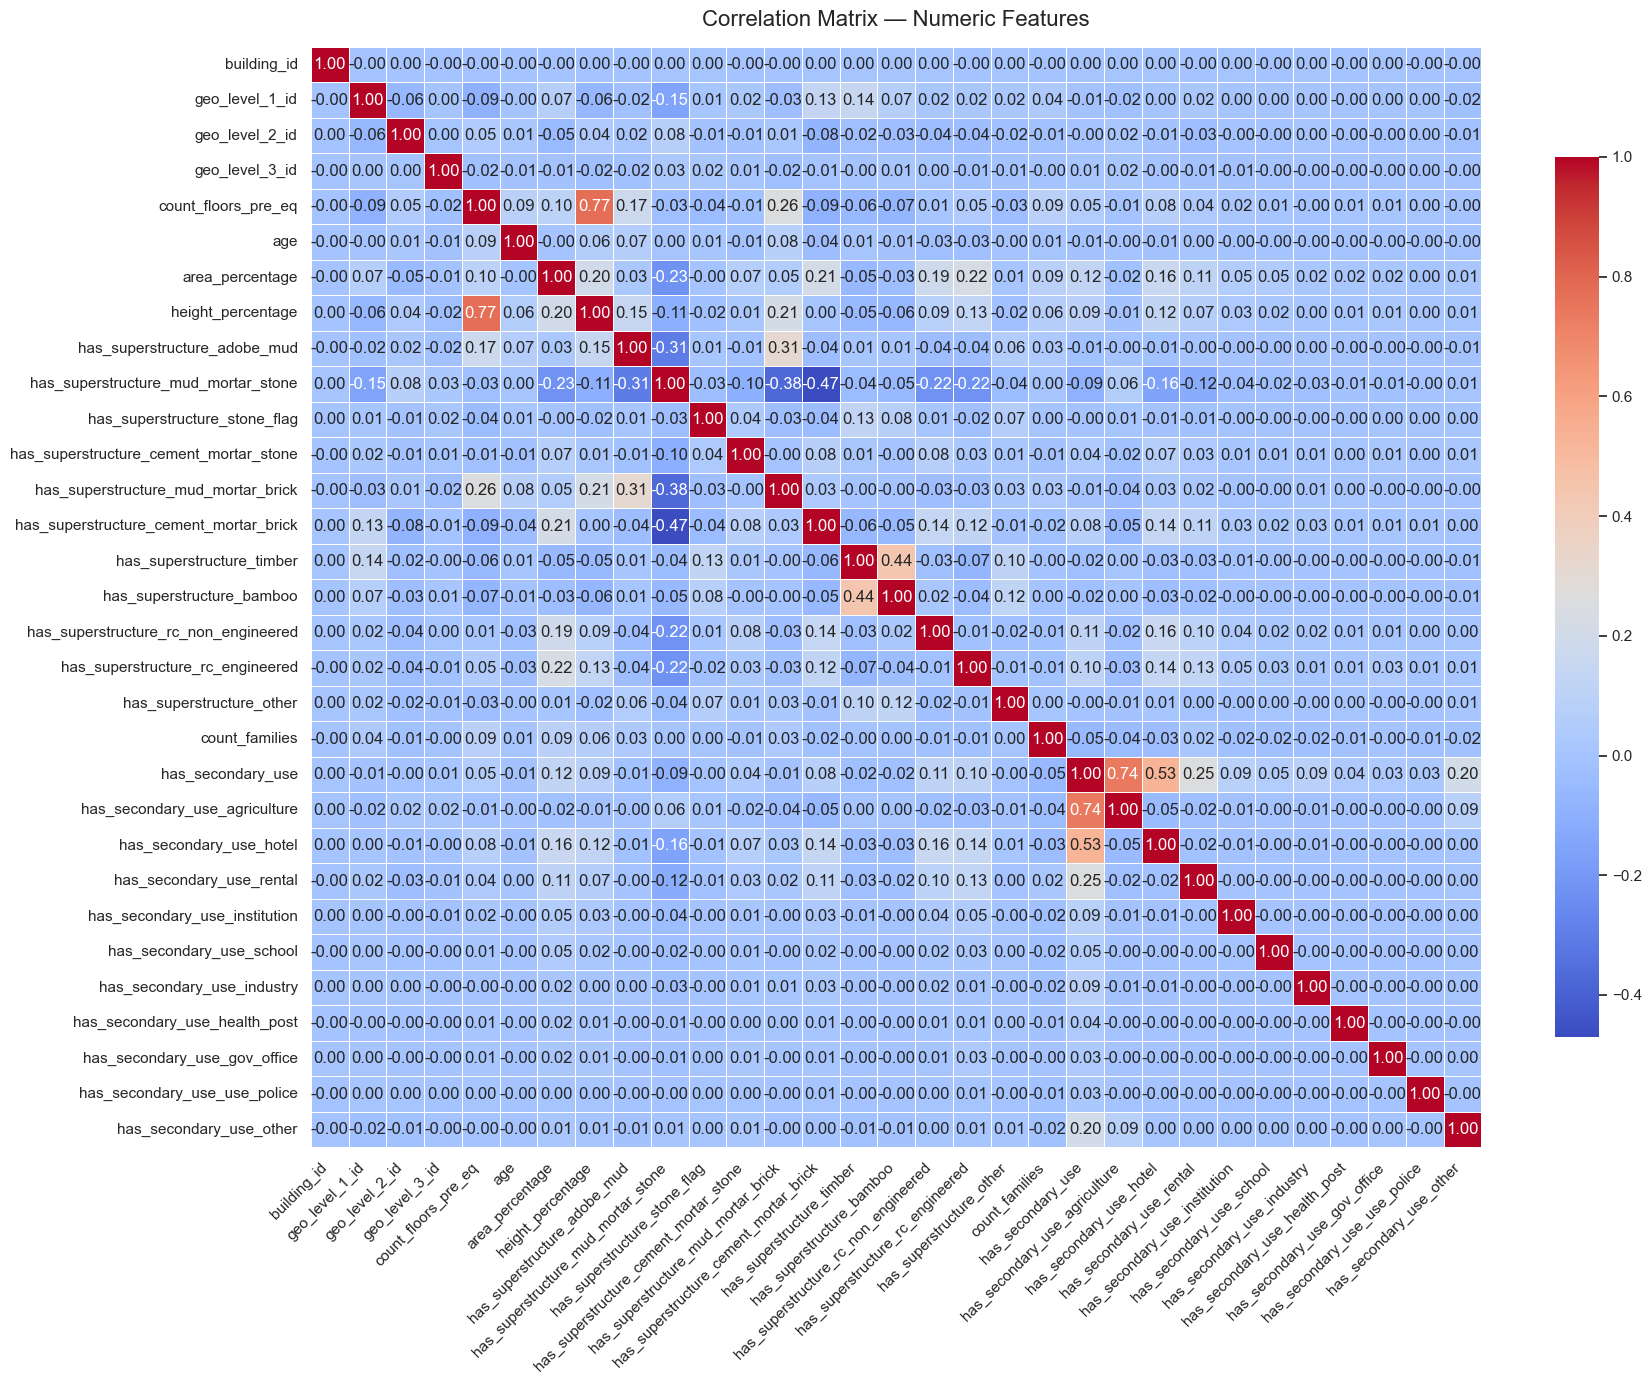

In [ ]:
# Select numeric columns only
numeric_columns = df_comp_train.select_dtypes(include=["float64", "int64"]).columns

# Compute correlation matrix
corr_matrix = df_comp_train[numeric_columns].corr()

# Plot heatmap
plt.figure(figsize=(18, 14))
sns.heatmap(
    corr_matrix,
    annot=True,
    cmap="coolwarm",
    fmt=".2f",
    linewidths=0.5,
    cbar_kws={"shrink": 0.8}
)
plt.title("Correlation Matrix — Numeric Features", fontsize=16, pad=15)
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)
plt.tight_layout()

# Save figure
fig_path = FIG_DIR / "correlation_matrix.png"
plt.savefig(fig_path, dpi=300)
plt.show()


# 10. Distribution of target variable

   damage_grade   count
0             1   25124
1             2  148259
2             3   87218


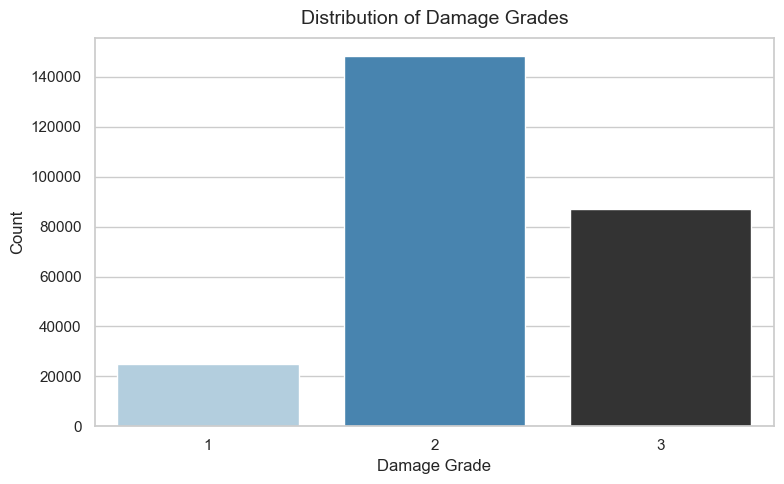

In [49]:
# Prepare data: count frequencies of each damage grade
df_damage_count = (
    df_comp_labels["damage_grade"]
    .value_counts()
    .sort_index()
    .reset_index()
)
df_damage_count.columns = ["damage_grade", "count"]
print(df_damage_count)

# Plot bar chart
plt.figure(figsize=(8, 5))
sns.barplot(
    x="damage_grade",
    hue="damage_grade",
    legend=False,
    y="count",
    data=df_damage_count,
    palette="Blues_d"
)

# Add title and labels
plt.title("Distribution of Damage Grades", fontsize=14, pad=10)
plt.xlabel("Damage Grade")
plt.ylabel("Count")
plt.tight_layout()

# Save figure
fig_path = FIG_DIR / "dist_target_var.png"
plt.savefig(fig_path, dpi=300)
plt.show()

# 11. Unique values for each colum


In [ ]:
def unique_values_per_attribute(df: pd.DataFrame, max_values: int = 10) -> dict:
    """
    Get unique values for each column in a DataFrame (truncated for readability).

    Args:
        df (pd.DataFrame): Input DataFrame.
        max_values (int): Maximum number of values to display per column.

    Returns:
        dict: Dictionary mapping column names to their unique values (or a preview of them).
    """
    unique_dict = {}
    for col in df.columns:
        values = df[col].unique()
        # Truncate long value lists for cleaner output
        if len(values) > max_values:
            preview = values[:max_values]
            unique_dict[col] = f"{preview} ... ({len(values)} unique values)"
        else:
            unique_dict[col] = values
    return unique_dict

# Example usage
unique_values = unique_values_per_attribute(df_comp_train)

# Print results
for col, vals in unique_values.items():
    print(f"{col}: {vals}")

building_id: [802906  28830  94947 590882 201944 333020 728451 475515 441126 989500] ... (260601 unique values)
geo_level_1_id: [ 6  8 21 22 11  9 20  0 26 17] ... (31 unique values)
geo_level_2_id: [487 900 363 418 131 558 475 323 757 886] ... (1414 unique values)
geo_level_3_id: [12198  2812  8973 10694  1488  6089 12066 12236  7219   994] ... (11595 unique values)
count_floors_pre_eq: [2 3 1 4 5 6 7 8 9]
age: [30 10 25  0 15 20 45 55  5 40] ... (42 unique values)
area_percentage: [ 6  8  5  9  3 13  7  4 12 16] ... (84 unique values)
height_percentage: [ 5  7  9  4  6  3 10  8  2 32] ... (27 unique values)
land_surface_condition: ['t' 'o' 'n']
foundation_type: ['r' 'w' 'i' 'u' 'h']
roof_type: ['n' 'q' 'x']
ground_floor_type: ['f' 'x' 'v' 'z' 'm']
other_floor_type: ['q' 'x' 'j' 's']
position: ['t' 's' 'j' 'o']
plan_configuration: ['d' 'u' 's' 'q' 'm' 'c' 'a' 'n' 'f' 'o']
has_superstructure_adobe_mud: [1 0]
has_superstructure_mud_mortar_stone: [1 0]
has_superstructure_stone_flag: [0 1